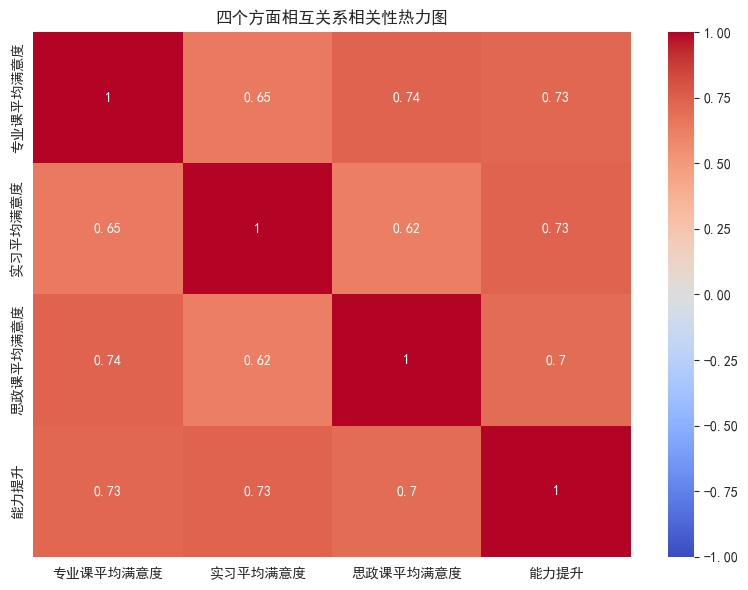

四个方面相关系数矩阵:
          专业课平均满意度   实习平均满意度  思政课平均满意度      能力提升
专业课平均满意度  1.000000  0.647164  0.741719  0.725952
实习平均满意度   0.647164  1.000000  0.622803  0.734512
思政课平均满意度  0.741719  0.622803  1.000000  0.696077
能力提升      0.725952  0.734512  0.696077  1.000000


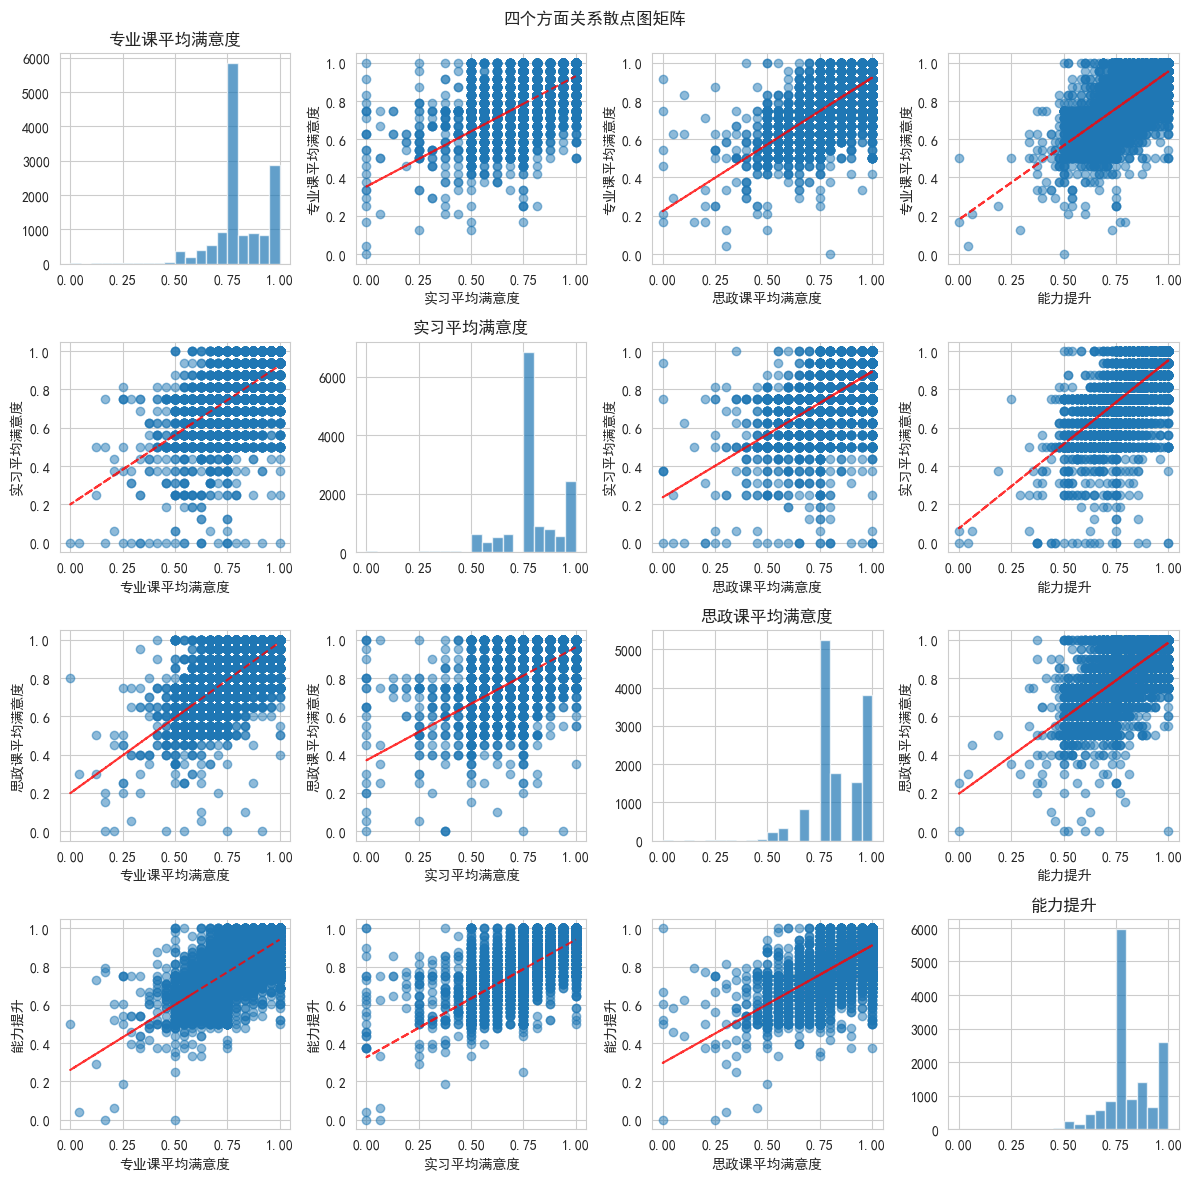


四个方面描述性统计:
           专业课平均满意度       实习平均满意度      思政课平均满意度          能力提升
count  13826.000000  13826.000000  13826.000000  13826.000000
mean       0.804496      0.783013      0.832352      0.807241
std        0.126019      0.141333      0.134011      0.118256
min        0.000000      0.000000      0.000000      0.000000
25%        0.750000      0.750000      0.750000      0.750000
50%        0.750000      0.750000      0.800000      0.750000
75%        0.916667      0.875000      1.000000      0.895833
max        1.000000      1.000000      1.000000      1.000000


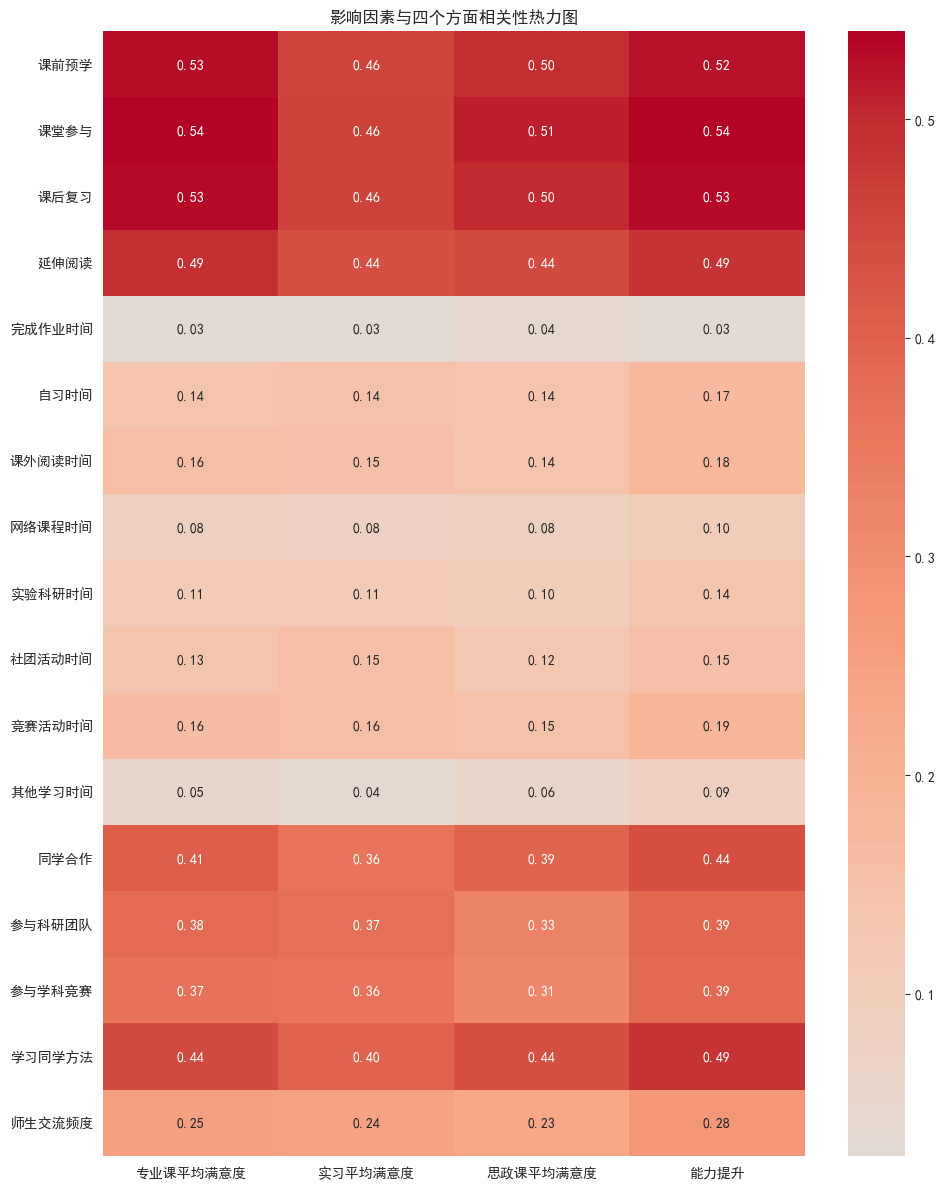


与四个方面相关性最高的前5个因素:

专业课平均满意度:
  课堂参与: 0.540
  课后复习: 0.530
  课前预学: 0.527
  延伸阅读: 0.491
  学习同学方法: 0.445

实习平均满意度:
  课堂参与: 0.461
  课后复习: 0.460
  课前预学: 0.458
  延伸阅读: 0.436
  学习同学方法: 0.399

思政课平均满意度:
  课堂参与: 0.510
  课后复习: 0.501
  课前预学: 0.497
  延伸阅读: 0.443
  学习同学方法: 0.437

能力提升:
  课堂参与: 0.540
  课后复习: 0.531
  课前预学: 0.524
  学习同学方法: 0.487
  延伸阅读: 0.487


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('../../data/intermediate/初步清洗_比赛数据_2.csv', sep=',', engine='python', encoding='utf-8')

# 去除制表符
df = df.map(lambda x: x.strip('\t') if isinstance(x, str) else x)

# 定义各类指标列
# 专业课列
zy_cols = [
    '专业课知识融合',
    '专业课解决问题能力',
    '专业课交叉融合',
    '专业课实践结合',
    '专业课努力程度',
    '专业课前沿内容'
]

# 实习列
sx_cols = [
    '实习内容满意度',
    '实习时间满意度',
    '实习场地满意度',
    '实习指导满意度',
]

# 思政课列
sizheng_cols = ['思政课总体满意度', '思政课设置满意度', '思政课内容满意度', '思政课质量满意度', '思政课效果满意度']

# 自我提升列
imp_cols = [
    '问题解决能力提升',
    '自主学习能力提升',
    '合作能力提升',
    '表达沟通能力提升',
    '未来规划能力提升',
    '人文底蕴提升',
    '科学精神提升',
    '学会学习提升',
    '健康生活提升',
    '责任担当提升',
    '实践创新提升',
    '自我提升'
]

# 计算各类平均满意度
df['专业课平均满意度'] = df[zy_cols].mean(axis=1)
df['实习平均满意度'] = df[sx_cols].mean(axis=1)
df['思政课平均满意度'] = df[sizheng_cols].mean(axis=1)
df['能力提升'] = df[imp_cols].mean(axis=1)

# 定义要分析的四个方面
aspects = ['专业课平均满意度', '实习平均满意度', '思政课平均满意度', '能力提升']

# 计算四个方面之间的相关系数矩阵
correlation_matrix = df[aspects].corr()

# 绘制四个方面相关性热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('四个方面相互关系相关性热力图')
plt.tight_layout()
plt.show()

# 输出相关系数矩阵
print("四个方面相关系数矩阵:")
print(correlation_matrix)

# 绘制散点图矩阵来可视化关系
fig, axes = plt.subplots(len(aspects), len(aspects), figsize=(12, 12))
fig.suptitle('四个方面关系散点图矩阵')

for i, aspect1 in enumerate(aspects):
    for j, aspect2 in enumerate(aspects):
        if i == j:
            # 对角线显示直方图
            axes[i, j].hist(df[aspect1].dropna(), bins=20, alpha=0.7)
            axes[i, j].set_title(aspect1)
        else:
            # 非对角线显示散点图
            axes[i, j].scatter(df[aspect2], df[aspect1], alpha=0.5)
            axes[i, j].set_xlabel(aspect2)
            axes[i, j].set_ylabel(aspect1)

            # 添加趋势线
            x = df[aspect2].dropna()
            y = df[aspect1].dropna()
            if len(x) > 0 and len(y) > 0:
                # 只使用两个变量都非空的数据
                mask = df[aspect1].notna() & df[aspect2].notna()
                if mask.sum() > 0:
                    x = df.loc[mask, aspect2]
                    y = df.loc[mask, aspect1]
                    if len(x) > 1:  # 确保有足够的点来拟合
                        z = np.polyfit(x, y, 1)
                        p = np.poly1d(z)
                        axes[i, j].plot(x, p(x), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# 计算描述性统计信息
print("\n四个方面描述性统计:")
print(df[aspects].describe())

# 分析影响因素与四个方面的关系
factors = [
    '课前预学',
    '课堂参与',
    '课后复习',
    '延伸阅读',
    '完成作业时间',
    '自习时间',
    '课外阅读时间',
    '网络课程时间',
    '实验科研时间',
    '社团活动时间',
    '竞赛活动时间',
    '其他学习时间',
    '同学合作',
    '参与科研团队',
    '参与学科竞赛',
    '学习同学方法',
    '师生交流频度'
]

# 创建一个包含所有因素和四个方面的相关矩阵
all_columns = factors + aspects
full_corr_matrix = df[all_columns].corr()

# 提取因素与四个方面之间的相关性
factor_aspect_corr = full_corr_matrix[aspects].loc[factors]

# 绘制因素与四个方面相关性热力图
plt.figure(figsize=(10, 12))
sns.heatmap(factor_aspect_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('影响因素与四个方面相关性热力图')
plt.tight_layout()
plt.show()

# 找出与每个方面相关性最高的前5个因素
print("\n与四个方面相关性最高的前5个因素:")
for aspect in aspects:
    top_factors = factor_aspect_corr[aspect].abs().sort_values(ascending=False).head(5)
    print(f"\n{aspect}:")
    for factor, corr_value in top_factors.items():
        print(f"  {factor}: {factor_aspect_corr.loc[factor, aspect]:.3f}")
